In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Exploratory Data Analysis

The goal of this notebook is to answer the 2 following questions : 
- What key mode do the composers use the most ?
- What are the chords that the different compsosers use the most ?

The graphs that we will plot will allow us to interpret with precision the different results obtained by the network

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from load_data import load_chord_data_sentences, load_key_data, all_composers, load_chord_data_df
from eda import nb_chords, list_all_chords, nb_occurence_chord, df_heatmap


['Bach', 'Debussy', 'Gesualdo', 'Grieg', 'Medtner', 'Schütz', 'Sweelinck', 'Wagner', 'Beethoven', 'Chopin', 'Corelli', 'Couperin', 'Dvorak', 'Kozeluh', 'Liszt', 'Mendelssohn', 'Monteverdi', 'Mozart', 'Pleyel', 'Ravel', 'Schubert', 'Schumann', 'Tchaikovsky', 'WFBach']


**Find the number of chords used by each composers**

In this section, we want to find the number of chords used by each composer, for each style.

In [4]:
from eda import nb_chords, ren_baroque, classical, romantic

df_nb, data = nb_chords(all_composers, ren_baroque, classical, romantic)
df_nb.head()

,composer,nb_chords,nb_chords_maj,date_of_birth,date_of_death
2,Gesualdo,365,81,1566,1613
6,Sweelinck,422,0,1562,1621
16,Monteverdi,3545,1443,1567,1643
5,Schütz,9934,3263,1585,1672
10,Corelli,4450,2786,1653,1713


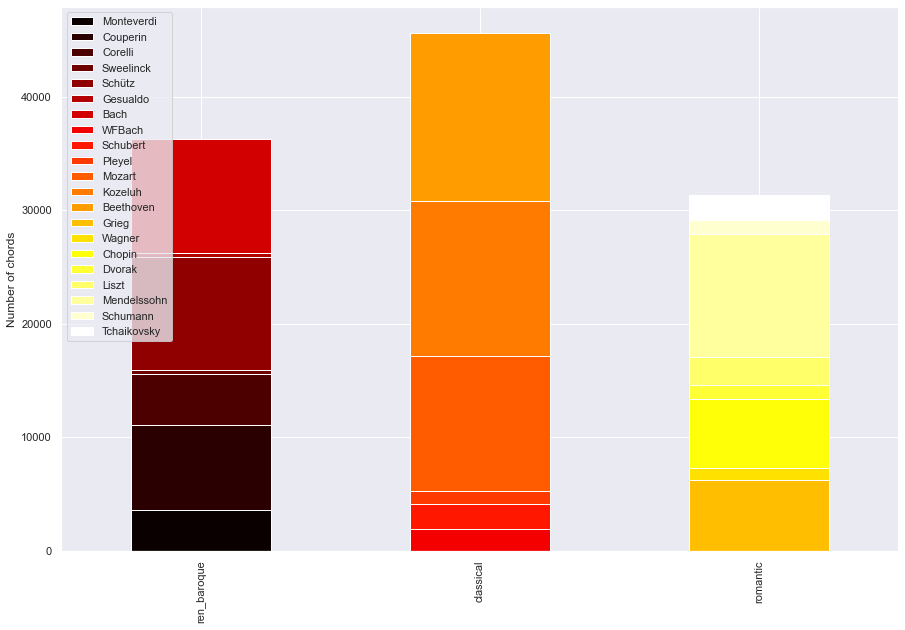

In [5]:
#plot the number of chords used for each composer and each style
sns.set()
ax = data.plot(kind='bar', stacked=True, figsize = (15,10), colormap = 'hot')
plt.ylabel('Number of chords')
plt.legend(loc = 'upper left')

In [21]:
#Plot the number of chords and the proportion of major chords for each composer

fig = plt.figure(figsize = (9,11), dpi = 1000)

plt.rc('font', size=16)          # controls default text sizes
plt.rc('legend', fontsize=15)    # legend fontsize

sns.set_style(style="whitegrid")

# Plot the number of major chords used
sns.set_color_codes("muted")
sns.barplot(x = 'nb_chords_maj', y = 'composer', data=df_nb, label="Major", color="b")

# Plot the total number of chords (we'll see the difference so we can label it 'minor')
sns.set_color_codes("pastel")
sns.barplot(x = 'nb_chords', y = 'composer', data=df_nb,label="Minor", color="b")

# Plot the number of major chords used again because else we won't see the bars
sns.set_color_codes("muted")
sns.barplot(x = 'nb_chords_maj', y = 'composer', data=df_nb, color="b")

plt.axhline(y=1.5, ls='--', color='black')
plt.axhline(y=7.55, ls='--', color='black')
plt.axhline(y=12.5, ls='--', color='black')
plt.axhline(y=20.5, ls='--', color='black')

plt.text(15000, 1, r'Renaiss.', fontsize=16, weight = 'bold')
plt.text(15000, 5, r'Baroque', fontsize=16, weight = 'bold')
plt.text(15000, 11, r'Classical', fontsize=16, weight = 'bold')
plt.text(15000, 16, r'Romantic', fontsize=16, weight = 'bold')
plt.text(15000, 22, r'Modern.', fontsize=16, weight = 'bold')

plt.xlim(xmax = 16000)
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='x', labelsize=12)

plt.xlabel('Number of chords');
plt.legend(loc = 'lower center');
plt.tight_layout()
plt.savefig('Figure1.png')

**Most used chords for all composers**

We find the number of occurence of each chords in all the dataset

In [7]:
df_occurence = nb_occurence_chord(all_composers)
df_occurence.head(3)

,chord,number_of_occurences
0,MAJOR;I:MAJ,18650
1,MAJOR;V:MAJ,16487
2,MINOR;I:MIN,11360


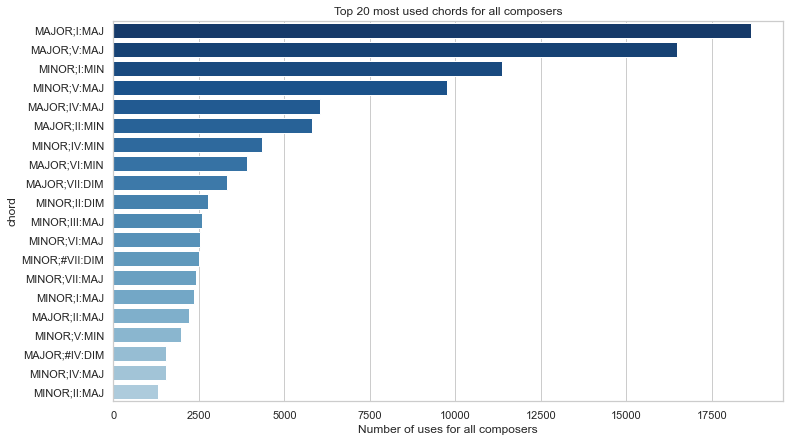

In [8]:
#we plot the top 20 most used chords
fig = plt.figure(figsize = (12,7))

sns.set_style(style="whitegrid")
ax = sns.barplot(x = 'number_of_occurences', y = 'chord', data = df_occurence.head(20), palette = sns.color_palette("Blues_r", 30))
ax.set_xlabel('Number of uses for all composers');
ax.set_title('Top 20 most used chords for all composers');

**Find the most used chords per composers**

First we plot the MINOR case

In [9]:
df_comp_chord = df_heatmap(all_composers, key_mode = 'MINOR', treshold = 500)
df_comp_chord.head(2)

,Bach,Debussy,Gesualdo,Grieg,Medtner,Schütz,Sweelinck,Wagner,Beethoven,Chopin,...,Liszt,Mendelssohn,Monteverdi,Mozart,Pleyel,Ravel,Schubert,Schumann,Tchaikovsky,WFBach
MINOR;I:MIN,0.183433,0.189815,0.214286,0.202726,0.196633,0.170087,0.143204,0.021429,0.231659,0.226463,...,0.268222,0.214805,0.217475,0.275137,0.259179,0.345133,0.303139,0.277929,0.329255,0.224371
MINOR;VI:MAJ,0.052263,0.071759,0.071429,0.063325,0.073380,0.057760,0.033981,0.035714,0.052766,0.055556,...,0.037901,0.052875,0.049448,0.042070,0.051836,0.026549,0.037668,0.043597,0.060067,0.029014


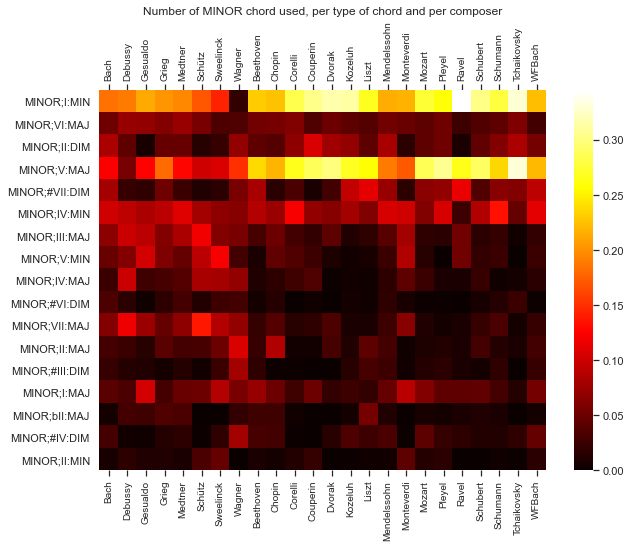

In [10]:
fig = plt.figure(figsize = (10,7))
ax = sns.heatmap(data = df_comp_chord, cmap ='hot')
ax.set_title('Number of MINOR chord used, per type of chord and per composer');
plt.tick_params(axis='x', labelsize=10, labelbottom = True, bottom=True, top = True, labeltop=True, labelrotation = 90)
plt.savefig('Heatmap_minor.png')

Then we plot the MAJOR chords

In [11]:
df_comp_chord = df_heatmap(all_composers, key_mode = 'MAJOR', treshold = 500)
df_comp_chord.head(2)

,Bach,Debussy,Gesualdo,Grieg,Medtner,Schütz,Sweelinck,Wagner,Beethoven,Chopin,...,Liszt,Mendelssohn,Monteverdi,Mozart,Pleyel,Ravel,Schubert,Schumann,Tchaikovsky,WFBach
MAJOR;I:MAJ,0.226087,0.208029,0.3125,0.232275,0.220295,0.228065,NaN,0.139903,0.282093,0.300965,...,0.309392,0.222789,0.303371,0.332681,0.371237,0.318471,0.338251,0.311243,0.360563,0.276461
MAJOR;V:MAJ,0.199233,0.211679,0.2125,0.250241,0.202312,0.141907,NaN,0.169100,0.263027,0.268810,...,0.268646,0.206199,0.226826,0.291884,0.322742,0.175159,0.321391,0.298225,0.323944,0.243286


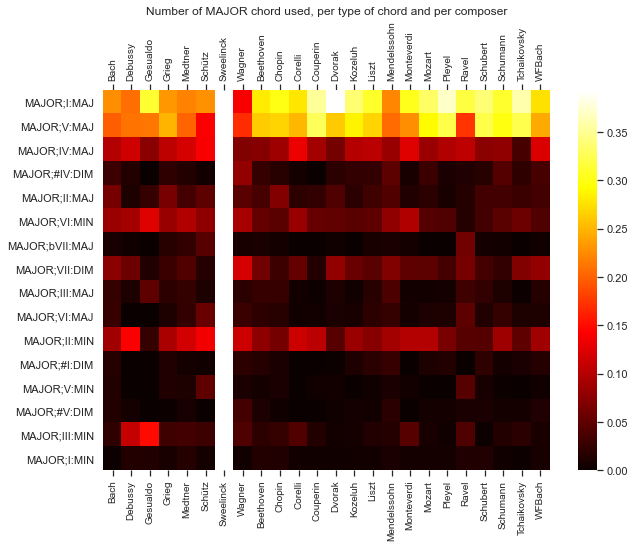

In [12]:
fig = plt.figure(figsize = (10,7))
ax = sns.heatmap(data = df_comp_chord, cmap ='hot')
ax.set_title('Number of MAJOR chord used, per type of chord and per composer');
plt.tick_params(axis='x', labelsize=10, labelbottom = True, bottom=True, top = True, labeltop=True, labelrotation = 90)
plt.savefig('Heatmap_major.png')